<a href="https://colab.research.google.com/github/HAFIZMUHAMMADUSMANZAHOOR/Counter/blob/main/slary_pridtion_ML_P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Dataset09-Employee-salary-prediction.csv")
df.head(3)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [ ]:
df.shape

(375, 6)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [ ]:
df.rename(columns={
    'Age': 'Age',
    'Gender': 'Gender',
    'Education Level': 'Qualification',
    'Job Title': 'Position',
    'Years of Experience': 'Experience (Years)',
    'Salary': 'Annual Salary'
}, inplace=True)

In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Qualification,object
Position,object
Experience (Years),float64
Annual Salary,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 373 non-null    float64
 1   Gender              373 non-null    object 
 2   Qualification       373 non-null    object 
 3   Position            373 non-null    object 
 4   Experience (Years)  373 non-null    float64
 5   Annual Salary       373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df [df.duplicated()]

,Age,Gender,Qualification,Position,Experience (Years),Annual Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [ ]:
df = df.drop_duplicates(keep="first")
df.shape

(325, 6)

In [ ]:
df.isnull().sum()

,0
Age,1
Gender,1
Qualification,1
Position,1
Experience (Years),1
Annual Salary,1


In [ ]:
df.describe()

,Age,Experience (Years),Annual Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [ ]:
corr=df[["Age","Experience (Years)","Annual Salary"]].corr()
corr

,Age,Experience (Years),Annual Salary
Age,1.000000,0.979192,0.916543
Experience (Years),0.979192,1.000000,0.924455
Annual Salary,0.916543,0.924455,1.000000


<Axes: >

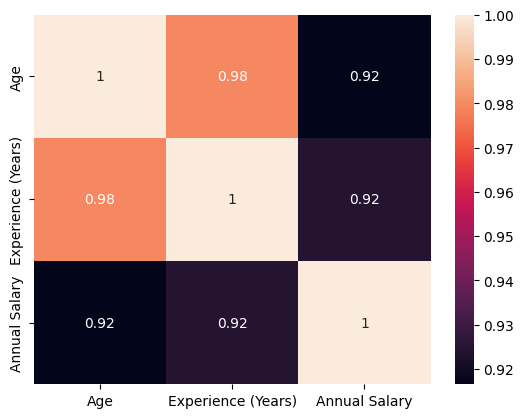

In [ ]:
sns.heatmap(corr, annot=True)


<Axes: xlabel='Annual Salary'>

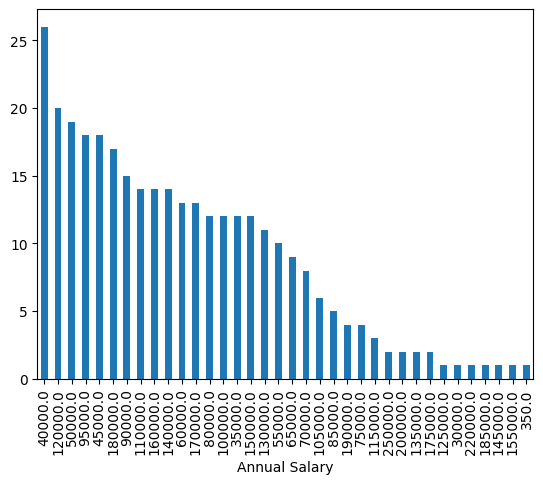

In [ ]:
# df["Annual Salary"].value_counts()
df["Annual Salary"].value_counts().plot(kind="bar")


<Axes: ylabel='Frequency'>

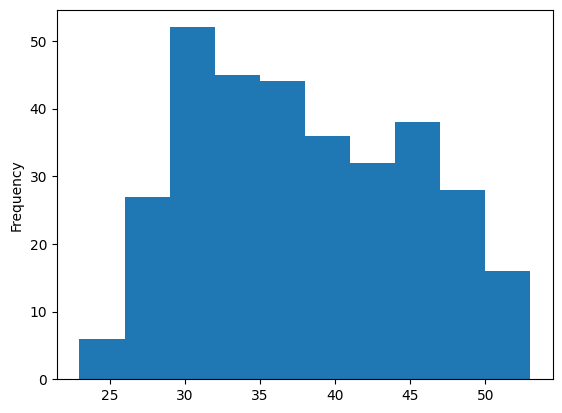

In [ ]:
df['Age'].plot(kind="hist")


<Axes: >

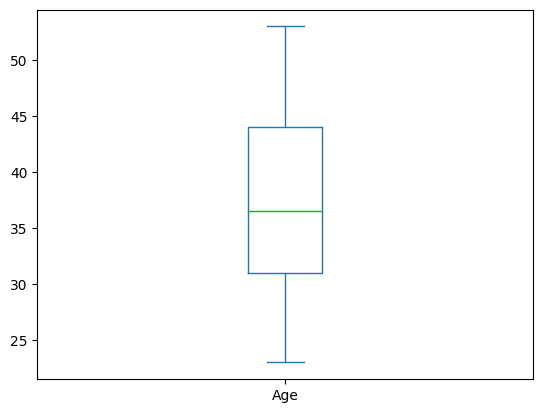

In [ ]:
df['Age'].plot(kind="box")


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
#  Encoding the columns
df["Employee Gender_encoded"] = gender_encoder.fit_transform(df["Employee Gender"])  # Use correct case
df["Qualification	_encoded"] = degree_encoder.fit_transform(df["Qualification"])
df["Position_encoded"] = job_title_encoder.fit_transform(df["Position"])


In [ ]:
df.head(3)

,Age,Gender,Qualification,Position,Experience (Years),Annual Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
std_scaler = StandardScaler()

# Fit and transform 'Employee Age' and 'Experience (Years)'
df["Employee Age_scaled"] = std_scaler.fit_transform(df[["Employee Age"]])  # Double brackets to make it 2D
df["Experience (Years)_scaled"] = std_scaler.fit_transform(df[["Experience (Years)"]])

# Display the DataFrame with scaled columns
print(df.head())


   Employee Age Employee Gender Qualification           Position  \
0          32.0            Male    Bachelor's  Software Engineer   
1          28.0          Female      Master's       Data Analyst   
2          45.0            Male           PhD     Senior Manager   
3          36.0          Female    Bachelor's    Sales Associate   
4          52.0            Male      Master's           Director   

   Experience (Years)  Annual Salary  Employee Gender_encoded  \
0                 5.0        90000.0                        1   
1                 3.0        65000.0                        0   
2                15.0       150000.0                        1   
3                 7.0        60000.0                        0   
4                20.0       200000.0                        1   

   Qualification\t_encoded  Position_encoded  Employee Age_scaled  \
0                        0               159            -0.750231   
1                        1                17            -1.307

In [ ]:
df.head(2)

,Age,Gender,Qualification,Position,Experience (Years),Annual Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply encoding to relevant columns
df['Age_encoded'] = le.fit_transform(df['Age'])
df['Position_encoded'] = le.fit_transform(df['Position'])
df['Qualification_encoded'] = le.fit_transform(df['Qualification'])

# Now create the feature matrix X with the required columns
X = df[['Age_encoded', 'Position_encoded', 'Experience (Years)', 'Qualification_encoded']]

# Display the first two rows of X
print(X.head(2))



   Age_encoded  Position_encoded  Experience (Years)  Qualification_encoded
0            9               159                 5.0                      0
1            5                17                 3.0                      1


In [ ]:
# Defining feature matrix (X) and target variable (y)
X = df[['Age_encoded', 'Position_encoded', 'Experience (Years)', 'Qualification_encoded']]
y = df['Annual Salary']


In [ ]:
# spliting testing and traning
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape



(260, 4)

In [ ]:
from sklearn.linear_model import LinearRegression
Linear_Regression_model= LinearRegression()

In [ ]:
# Check for missing values
print(df.isnull().sum())


Age                      1
Gender                   1
Qualification            1
Position                 1
Experience (Years)       1
Annual Salary            1
Age_encoded              0
Position_encoded         0
Qualification_encoded    0
dtype: int64


In [ ]:
# Fill missing values with the column mean (for numerical columns)
X_train.fillna(X_train.mean(), inplace=True)

# Alternatively, you can fill with median or mode
# X_train.fillna(X_train.median(), inplace=True)
# X_train.fillna(X_train.mode().iloc[0], inplace=True)


In [ ]:
print(df['Annual Salary'].isnull().sum())
# Drop rows where 'Salary' is NaN
df = df.dropna(subset=['Annual Salary'])

# Redefine X and y after dropping NaN rows
X = df[['Age_encoded', 'Position_encoded', 'Experience (Years)', 'Qualification_encoded']]
y = df['Annual Salary']

# Splitting the data again after cleaning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
Linear_Regression_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = Linear_Regression_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

# Output the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Fill missing 'Salary' values with the mean of the column
df['Annual Salary'].fillna(df['Annual Salary'].mean(), inplace=True)

# Proceed with the rest of the process as before


1
Mean Squared Error: 246802899.243961
R-squared: 0.8694017359827995


<ipython-input-51-19bd208c9bbf>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual Salary'].fillna(df['Annual Salary'].mean(), inplace=True)


In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 15709.961783656923


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 11844.449275678922


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred_lr)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 11844.449275678922


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Linear_Regression_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated MSE:", -scores.mean())


Cross-validated MSE: 337352755.67414296


In [ ]:
Linear_Regression_model.intercept_

21245.355065232216

In [ ]:
Linear_Regression_model.coef_

array([ 2464.78345712,    24.12974359,  3293.18642328, 15046.60589019])

In [ ]:
df.head(2)


,Age,Gender,Qualification,Position,Experience (Years),Annual Salary,Age_encoded,Position_encoded,Qualification_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,9,159,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,5,17,1


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
std_scaler = StandardScaler()

# Fit the scaler on the 'Age' column of the training data
std_scaler.fit(X_train[['Age_encoded']])  # Assuming 'Age_encoded' is part of X_train

# Now transform a new age value (for example: 49)
age1 = std_scaler.transform([[19]])

print(age1)


[[0.60216689]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Check for missing (NaN) values in 'Salary' column
missing_salary_count = df['Annual Salary'].isnull().sum()

# Output the result
print("Missing values in 'Annual Salary' column:", missing_salary_count)


Missing values in 'Annual Salary' column: 0


In [ ]:
df = df.dropna(subset=['Annual Salary'])


In [ ]:
df['Annual Salary'].fillna(df['Annual Salary'].mean(), inplace=True)


<ipython-input-70-e9efa4a189d8>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Annual Salary'].fillna(df['Annual Salary'].mean(), inplace=True)
